In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

## load the data

In [6]:
file_path="/content/drive/My Drive/Data/BrentOilPrices.csv"

df=pd.read_csv(file_path)

In [7]:
# change the Date column to a date  time format
df["Date"]=pd.to_datetime(df["Date"], dayfirst=True)
# sort the date
df.sort_values("Date",inplace=True)
df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-1482504527.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"], dayfirst=True)


## Visualize the Raw Time Series

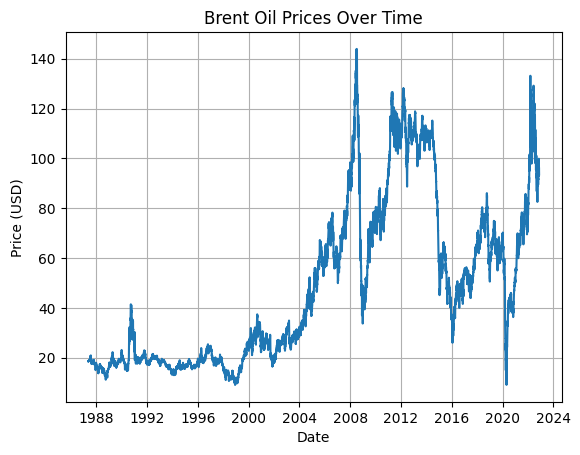

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Price'])
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


## Prepare an Events Dataset

In [9]:
import csv

data={
    "Date": [
        "1990-08-02", "1991-01-17", "1997-07-02", "1999-03-23", "2001-09-11",
        "2003-03-20", "2005-08-29", "2008-07-11", "2008-09-15", "2010-04-20",
        "2011-01-25", "2011-03-11", "2012-07-01", "2014-06-10", "2014-11-27",
        "2015-07-14", "2016-11-30", "2017-06-05", "2018-05-08", "2019-09-14",
        "2020-03-09", "2020-04-20", "2020-12-03", "2021-03-23", "2021-07-18",
        "2022-02-24", "2022-07-01", "2023-10-07", "2023-12-15", "2024-04-10",
        "2024-07-01", "2025-01-05"
    ],
    "event": [
        "Iraq invades Kuwait, beginning the Gulf War",
        "Operation Desert Storm begins, air campaign against Iraq",
        "Asian Financial Crisis begins (Thailand devalues currency)",
        "OPEC agrees to production cuts to counter low prices",
        "9/11 Terrorist attacks in the US",
        "U.S. invasion of Iraq",
        "Hurricane Katrina disrupts Gulf oil production",
        "Oil hits record $147 per barrel amid global demand fears",
        "Lehman Brothers collapses; Global Financial Crisis deepens",
        "Deepwater Horizon oil spill in the Gulf of Mexico",
        "Arab Spring protests begin (Tunisia, Egypt, Libya, etc.)",
        "Japan earthquake/tsunami; Fukushima nuclear disaster",
        "EU imposes oil embargo on Iran",
        "ISIS seizes oil fields in Iraq",
        "OPEC refuses to cut production despite oversupply",
        "Iran nuclear deal agreed (JCPOA)",
        "OPEC and Russia agree to production cut (first joint pact)",
        "Qatar diplomatic crisis affects oil logistics",
        "U.S. exits Iran nuclear deal, sanctions re-imposed",
        "Drone attacks on Saudi Aramco facilities (Abqaiq, Khurais)",
        "Russia-Saudi oil price war begins; COVID panic intensifies",
        "U.S. oil futures turn negative for first time in history",
        "OPEC+ agrees to gradual production increase",
        "Suez Canal blocked by Ever Given, disrupting global oil flow",
        "OPEC+ compromise to gradually increase output",
        "Russia invades Ukraine; major sanctions imposed",
        "OPEC+ agrees to accelerate production hikes",
        "Israel-Hamas war begins, raising regional oil tensions",
        "Houthi rebels attack Red Sea shipping lanes",
        "U.S. SPR releases end; oil prices rebound",
        "OPEC+ extends production cuts through end of year",
        "Iran-U.S. naval standoff escalates in the Strait of Hormuz"
    ]
}

event_df=pd.DataFrame(data)
event_df.to_csv("BrentOilEvents.csv",index=False)

## Preprocessing for Modeling

In [10]:
# Calculate log returns
df["log_return"]=np.log(df["Price"]/df["Price"].shift(1))

In [ ]:
# Assumptions:
# - Events impact price immediately or near the date.
# - Mean/variance changes can be detected statistically.

# Limitations:
# - Change point detection shows correlation, not causation.
# - Multiple overlapping events may affect results.
# - Markets can react in anticipation or with delay.

#  Communication Strategy
# - Audience-specific formats:
#   • Investors → Dashboards
#   • Policymakers → PDF reports
#   • Public/blog readers → Blog post with visuals
# - Use GitHub repo for code sharing.

#  Understanding the Model and Data

# 1. Understand Brent Oil Price Time Series
# - Non-stationary: Has trend + shocks
# - May have volatility clustering
# - Consider transformation using log returns

# 2. Purpose of Change Point Model
# - Identify points where statistical properties (mean, variance) change
# - Key to identifying structural shifts from events

# 3. Why Bayesian Change Point Detection?
# - Offers probabilistic outputs instead of single-point estimates
# - Incorporates prior beliefs and uncertainty
# - PyMC3 (or PyMC) allows modeling using MCMC

# 4. Expected Outputs
# - Likely change point date(s)
# - Mean/volatility before and after the change
# - Confidence in change detection
# - Link to a specific historical event

# 5. Limitations of Change Point Models
# - Cannot directly prove causation
# - Sensitive to model tuning
# - May detect false positives due to noise